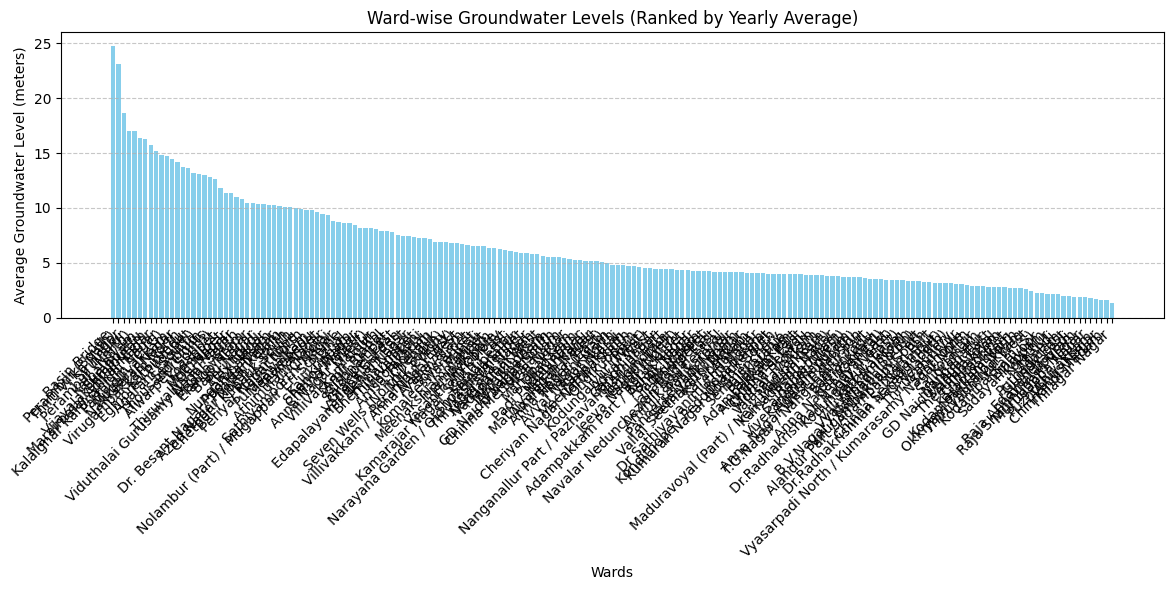


Wards Ranked by Groundwater Levels:
            Location  Year  Yearly Average   Rank  Variability          Trend
0        Kathivakkam  2021        1.788182  189.0     0.174495      Declining
1        Kathivakkam  2021        3.213250  149.0     0.452457      Declining
2           Ernavoor  2021        2.277083  176.0     0.463339      Declining
3     Sadaiyankuppam  2021        3.478167  139.0     0.523349      Declining
4    Kamadhenu Nagar  2021        3.776333  122.0     0.651943      Declining
..               ...   ...             ...    ...          ...            ...
195      Injampakkam  2024        5.663333   44.0     0.366379  Stable/Rising
196       Karapakkam  2024        2.196667  163.0     0.674858  Stable/Rising
197  Shozhinganallur  2024        5.630000   46.0     1.048427  Stable/Rising
198          Uthandi  2024        1.326667  185.0     0.462313  Stable/Rising
199      Semmenchery  2024        3.326667  115.0     0.447474  Stable/Rising

[800 rows x 6 columns]

Wa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths for 2021-2024
file_path_2021 = "../dataset/chennai-ground-water-levels-2021.csv"
file_path_2022 = "../dataset/chennai-ground-water-levels-2022.csv"
file_path_2023 = "../dataset/chennai-ground-water-levels-2023.csv"
file_path_2024 = "../dataset/chennai-ground-water-levels-2024.csv"

# Load datasets
df_2021 = pd.read_csv(file_path_2021)
df_2022 = pd.read_csv(file_path_2022)
df_2023 = pd.read_csv(file_path_2023)
df_2024 = pd.read_csv(file_path_2024)

# List of monthly columns
monthly_columns = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Data Preparation: Ensure all datasets have necessary columns
def prepare_data(df, year=None):
    if year == 2024:
        df[monthly_columns[3:]] = np.nan  # Set Apr-Dec to NaN for 2024
    df[monthly_columns] = df[monthly_columns].apply(pd.to_numeric, errors='coerce')
    df["Yearly Average"] = df[monthly_columns].mean(axis=1)
    return df

# Apply preparation function
df_2021 = prepare_data(df_2021, 2021)
df_2022 = prepare_data(df_2022, 2022)
df_2023 = prepare_data(df_2023, 2023)
df_2024 = prepare_data(df_2024, 2024)

# Add Year Column
df_2021["Year"] = 2021
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# Combine all datasets
df_all_years = pd.concat([df_2021, df_2022, df_2023, df_2024])

# Step 1: Rank Wards by Average Groundwater Level
df_all_years["Rank"] = df_all_years.groupby("Year")["Yearly Average"].rank(ascending=False)

# Step 2: Identify Wards with Consistent Drops or High Variability
df_all_years["Variability"] = df_all_years[monthly_columns].std(axis=1)
df_all_years["Trend"] = df_all_years[monthly_columns].apply(lambda x: "Declining" if x.iloc[-1] < x.iloc[0] else "Stable/Rising", axis=1)

# Create directory for saving plots
output_dir = "ward level comp"
os.makedirs(output_dir, exist_ok=True)

# Step 3: Split Locations into Groups of 6
locations = df_all_years["Location"].unique()
num_plots = int(np.ceil(len(locations) / 6))  # Calculate number of plots needed

# Step 4: Loop through each year and generate plots
years = [2021, 2022, 2023, 2024]
for year in years:
    df_year = df_all_years[df_all_years["Year"] == year]  # Filter data for specific year

    for i in range(num_plots):
        plt.figure(figsize=(12, 6))

        start_idx = i * 6
        end_idx = start_idx + 6
        selected_locations = locations[start_idx:end_idx]  # Select 6 locations per plot

        for location in selected_locations:
            subset = df_year[df_year["Location"] == location]
            
            if not subset.empty:  # Ensure the location exists in this year's data
                values = subset[monthly_columns].iloc[0].values  
                plt.plot(monthly_columns, values, marker='o', label=location)

        # Prepare plot title and filename
        plot_title = f"Monthly Groundwater Levels for {year} (Wards {start_idx + 1}-{min(end_idx, len(locations))})"
        plt.xlabel("Months")
        plt.ylabel("Groundwater Level (m)")
        plt.title(plot_title)
        plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Wards")
        plt.grid()
        plt.tight_layout()

        # Save plot
        sanitized_title = plot_title.replace(" ", "_").replace(":", "").replace("(", "").replace(")", "")
        plt.savefig(os.path.join(output_dir, f"{sanitized_title}.png"))
        plt.close()

# Step 5: Visualize Wards Ranked by Groundwater Levels
plt.figure(figsize=(12, 6))
df_sorted = df_all_years.sort_values("Yearly Average", ascending=False)
plt.bar(df_sorted["Location"], df_sorted["Yearly Average"], color="skyblue")
plt.title("Ward-wise Groundwater Levels (Ranked by Yearly Average)")
plt.xlabel("Wards")
plt.ylabel("Average Groundwater Level (meters)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Ward-wise_Groundwater_Levels.png"))
plt.show()

# Step 6: Display Insights
high_variability = df_all_years[df_all_years["Variability"] > df_all_years["Variability"].mean()]
declining_trends = df_all_years[df_all_years["Trend"] == "Declining"]

# Print ward rankings
print("\nWards Ranked by Groundwater Levels:")
print(df_all_years[["Location", "Year", "Yearly Average", "Rank", "Variability", "Trend"]])

# Print high variability wards
print("\nWards with High Variability in Groundwater Levels:")
print(high_variability[["Location", "Yearly Average", "Variability"]])

# Print wards with declining trends
print("\nWards with Declining Trends in Groundwater Levels:")
print(declining_trends[["Location", "Yearly Average", "Trend"]])


In [2]:
# Save high variability wards data
high_variability_output = os.path.join(output_dir, "high_variability_wards.csv")
high_variability[["Location", "Yearly Average", "Variability"]].to_csv(high_variability_output, index=False)
print(f"High variability wards saved to: {high_variability_output}")

# Save declining trend wards data
declining_trends_output = os.path.join(output_dir, "declining_trend_wards.csv")
declining_trends[["Location", "Yearly Average", "Trend"]].to_csv(declining_trends_output, index=False)
print(f"Declining trend wards saved to: {declining_trends_output}")

# Save stable/rising trend wards data
stable_rising = df_all_years[df_all_years["Trend"] == "Stable/Rising"]
stable_rising_output = os.path.join(output_dir, "stable_rising_wards.csv")
stable_rising[["Location", "Yearly Average", "Trend"]].to_csv(stable_rising_output, index=False)
print(f"Stable/Rising trend wards saved to: {stable_rising_output}")


High variability wards saved to: ward level comp\high_variability_wards.csv
Declining trend wards saved to: ward level comp\declining_trend_wards.csv
Stable/Rising trend wards saved to: ward level comp\stable_rising_wards.csv
